In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

In [66]:
"""# Parámetros de estilo de la gráfica
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(tex_fonts)
plt.rcParams["figure.figsize"] = (5, 2.5)"""

'# Parámetros de estilo de la gráfica\ntex_fonts = {\n    "text.usetex": True,\n    "font.family": "serif",\n    "axes.labelsize": 10,\n    "font.size": 10,\n    "legend.fontsize": 9,\n    "xtick.labelsize": 9,\n    "ytick.labelsize": 9\n}\n\nplt.style.use(\'seaborn-v0_8-white\')\nplt.rcParams.update(tex_fonts)\nplt.rcParams["figure.figsize"] = (5, 2.5)'

# Ajustes

In [67]:
def line_gaussian(x, amplitude, mean, sigma, a0, a1):
    return (amplitude * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2)) 
            + a0 + a1*(x-mean))

def line(x, a0, a1):
    return a0 + a1*x

def line_double_gaussian(x, amplitude_1, mean_1, sigma_1,
                        amplitude_2, mean_2, sigma_2, a0, a1):
    return (amplitude_1 * np.exp(-((x - mean_1) ** 2) / (2 * sigma_1 ** 2))
            + amplitude_2 * np.exp(-((x - mean_2) ** 2) / (2 * sigma_2 ** 2)) 
            + a0 + a1*(x-mean_1))

def fit_curve(x_data, y_data, function, initial_guess):
    params, covs = opt.curve_fit(function, x_data, y_data, p0=initial_guess)
    return params, covs  # Returns [amplitude, mean, sigma]

def graph(canales, cuentas, function, params):
    canales_plot = np.linspace(np.min(canales), np.max(canales))
    plt.plot(canales, cuentas, linewidth = 2, label = 'datos', ds ='steps-post')
    plt.plot(canales_plot, function(canales_plot, *params),
            label = 'ajuste', linestyle = '--', color = 'k')
    plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
    plt.xlabel('Canales')
    plt.ylabel('Cuentas')
    plt.legend()
    plt.show()

# Cesio 137

In [68]:
cs137 = pd.read_csv('Cs137_5minNaI.csv')
canales = np.array(cs137['canal'])
cuentas = np.array(cs137['cuentas'])

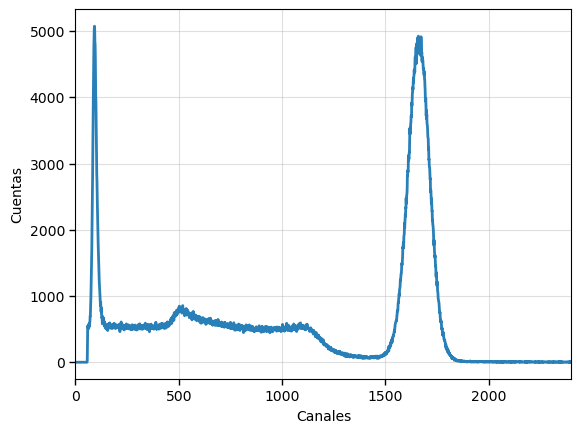

In [69]:
plt.plot(canales, cuentas, linewidth = 2, color = '#2980b9')
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.xlim(0, 2400)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.savefig('cs137', dpi = 300, bbox_inches ='tight')
plt.show()

## Pico 1


In [70]:
canales = np.array(cs137['canal'][1420:1900])
cuentas = np.array(cs137['cuentas'][1420:1900])
initial_guess = [max(cuentas), np.mean(canales), np.std(canales), 
                            min(cuentas), (cuentas[-1] - cuentas[0])/(canales[-1] - canales[0]) ]
paramsCs137_1, cov_Cs137_1 = fit_curve(canales, cuentas, line_gaussian, initial_guess)

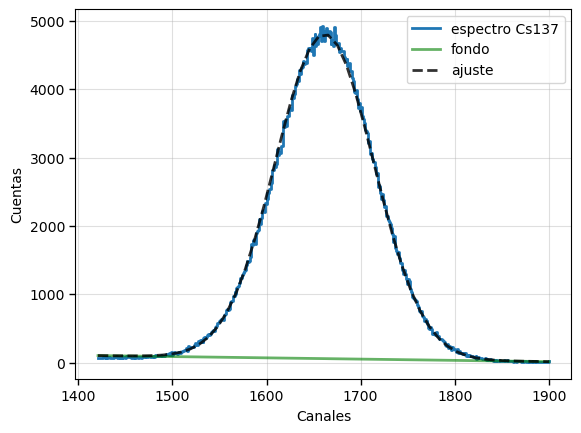

In [71]:
canales_plot = np.linspace(np.min(canales), np.max(canales))
plt.plot(canales, cuentas, ds ='steps-post', label = 'espectro Cs137', linewidth = 2)
plt.plot(canales_plot, paramsCs137_1[-2] + (canales_plot-paramsCs137_1[1])*paramsCs137_1[-1],
        label = 'fondo', color ='g', linewidth = 2, alpha = 0.6)
plt.plot(canales_plot, line_gaussian(canales_plot, *paramsCs137_1), label = 'ajuste',
        color = 'k', linestyle = '--', linewidth = 2, alpha = 0.8)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()
plt.savefig('cs137_3', dpi = 300, bbox_inches ='tight')
plt.show()

In [115]:
amplitud, centroide, std, a0, a1 = paramsCs137_1

print('Centroide = {} [canales]'.format(centroide))
print('Desviación Estándar = {} [canales]'.format(std))
print('FWHM = {} [canales]'.format(2.355*std))
print('Intesidad = {} [cuentas]'.format(amplitud*np.sqrt(2*np.pi)*std))

Centroide = 1661.6251789432092 [canales]
Desviación Estándar = 52.232694283196956 [canales]
FWHM = 123.00799503692883 [canales]
Intesidad = 621841.7417871626 [cuentas]


## Pico 2

In [73]:
canales = np.array(cs137['canal'][58:130])
cuentas = np.array(cs137['cuentas'][58:130])

In [74]:
# Ajuste de Línea y Gausiana
initial_guess = [max(cuentas), np.mean(canales), np.std(canales), 
                            min(cuentas), (cuentas[-1] - cuentas[0])/(canales[-1] - canales[0]) ]
paramsCs137_2, _ = fit_curve(canales, cuentas, line_gaussian, initial_guess)

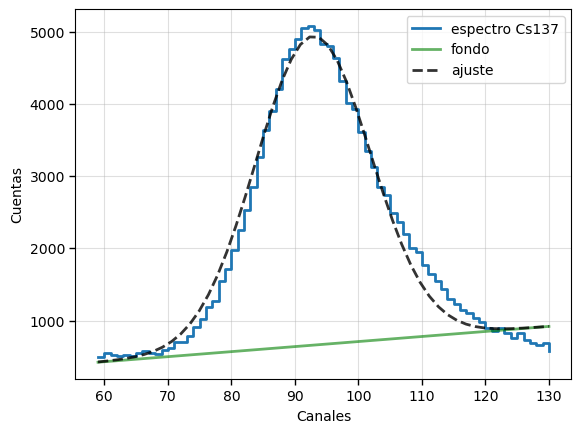

In [75]:
canales_plot = np.linspace(np.min(canales), np.max(canales))
plt.plot(canales, cuentas, ds ='steps-post', label = 'espectro Cs137', linewidth = 2)
plt.plot(canales_plot, paramsCs137_2[-2] + (canales_plot-paramsCs137_2[1])*paramsCs137_2[-1],
        label = 'fondo', color ='g', linewidth = 2, alpha = 0.6)
plt.plot(canales_plot, line_gaussian(canales_plot, *paramsCs137_2), label = 'ajuste',
        color = 'k', linestyle = '--', linewidth = 2, alpha = 0.8)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()
plt.savefig('cs137_1', dpi = 300, bbox_inches ='tight')
plt.show()

In [76]:
amplitud, centroide, std, a0, a1 = paramsCs137_2

print('Centroide_1 = {} [canales]'.format(centroide))
print('Desviación Estándar_1 = {} [canales]'.format(std))
print('FWHM_1 = {} [canales]'.format(2.355*std))
print('Intesidad_1 = {} [cuentas]'.format(amplitud*np.sqrt(2*np.pi)*std))

Centroide_1 = 92.857964138028 [canales]
Desviación Estándar_1 = 9.04013555784904 [canales]
FWHM_1 = 21.28951923873449 [canales]
Intesidad_1 = 96887.6169083037 [cuentas]


In [77]:
# Ajuste de Línea y suma de Gausianas
initial_guess = [2500, 85, 10, 2500, 100, 10, min(cuentas), (cuentas[-1] - cuentas[0])/(canales[-1] - canales[0])]
paramsCs137_3, _ = fit_curve(canales, cuentas, line_double_gaussian, initial_guess)

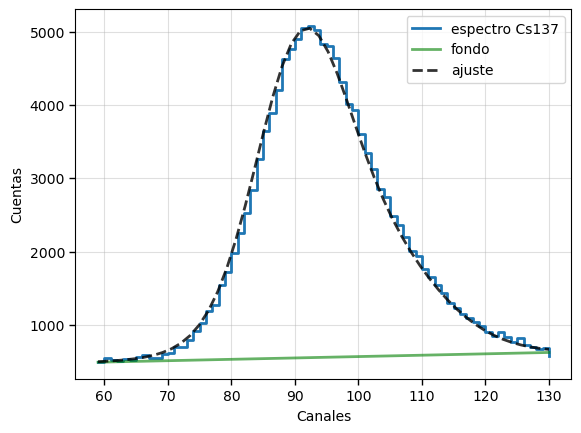

In [78]:
canales_plot = np.linspace(np.min(canales), np.max(canales))
plt.plot(canales, cuentas, ds ='steps-post', label = 'espectro Cs137', linewidth = 2)
plt.plot(canales_plot, paramsCs137_3[-2] + (canales_plot-paramsCs137_3[1])*paramsCs137_3[-1],
        label = 'fondo', color ='g', linewidth = 2, alpha = 0.6)
plt.plot(canales_plot, line_double_gaussian(canales_plot, *paramsCs137_3), label = 'ajuste',
        color = 'k', linestyle = '--', linewidth = 2, alpha = 0.8)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()
plt.savefig('cs137_2', dpi = 300, bbox_inches ='tight')
plt.show()

In [79]:
amplitud_1, centroide_1, std_1, amplitud_2, centroide_2, std_2, a0, a1 = paramsCs137_3

print('Centroide_1 = {} [canales]'.format(centroide_1))
print('Desviación Estándar_1 = {} [canales]'.format(std_1))
print('FWHM_1 = {} [canales]'.format(2.355*std_1))
print('Intesidad_1 = {} [cuentas]'.format(amplitud_1*np.sqrt(2*np.pi)*std_1))

Centroide_1 = 90.64142819336976 [canales]
Desviación Estándar_1 = 6.786697129251401 [canales]
FWHM_1 = 15.98267173938705 [canales]
Intesidad_1 = 47549.35678052479 [cuentas]


In [80]:
print('Centroide_2 = {} [canales]'.format(centroide_2))
print('Desviación Estándar_2 = {} [canales]'.format(std_2))
print('FWHM_2 = {} [canales]'.format(2.355*std_2))
print('Intesidad_2 = {} [cuentas]'.format(amplitud_2*np.sqrt(2*np.pi)*std_2))

Centroide_2 = 97.75448395460087 [canales]
Desviación Estándar_2 = 11.580194895620991 [canales]
FWHM_2 = 27.271358979187433 [canales]
Intesidad_2 = 57754.20442158486 [cuentas]


# Cobalto 60

In [81]:
co60 = pd.read_csv('Co60_10minNaI.csv')
canales = np.array(co60['canal'])
cuentas = np.array(co60['cuentas'])

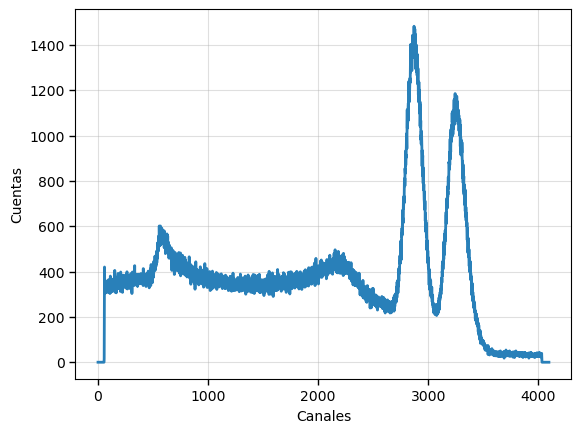

In [82]:
plt.plot(canales, cuentas, linewidth = 2, color = '#2980b9')
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.savefig('co60', dpi = 300, bbox_inches ='tight')
plt.show()

## Doble Pico

In [83]:
canales = np.array(co60['canal'][2400:3800])
cuentas = np.array(co60['cuentas'][2400:3800])
initial_guess = [1450, 2860, 100, 1100, 3300, 100, min(cuentas), (cuentas[-1] - cuentas[0])/(canales[-1] - canales[0])]
paramsCo60, _ = fit_curve(canales, cuentas, line_double_gaussian,initial_guess)

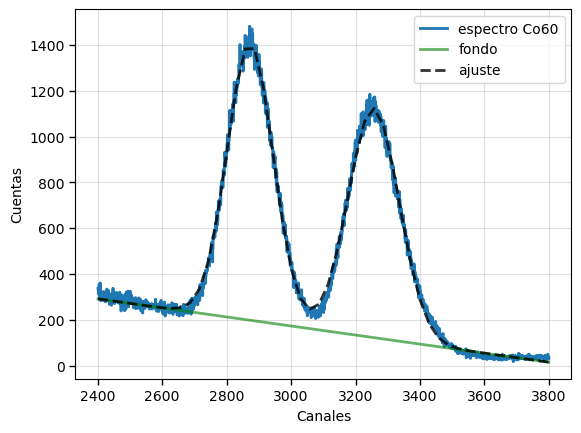

In [84]:
canales_plot = np.linspace(np.min(canales), np.max(canales))
plt.plot(canales, cuentas, ds ='steps-post', label = 'espectro Co60', linewidth = 2)
plt.plot(canales_plot, paramsCo60[-2] + (canales_plot-paramsCo60[1])*paramsCo60[-1],
        label = 'fondo', color ='g', linewidth = 2, alpha = 0.6)
plt.plot(canales_plot, line_double_gaussian(canales_plot, *paramsCo60), label = 'ajuste',
        color = 'k', linestyle = '--', linewidth = 2, alpha = 0.8)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()
plt.savefig('co60_1', dpi = 300, bbox_inches ='tight')
plt.show()

In [85]:
amplitud_1, centroide_1, std_1, amplitud_2, centroide_2, std_2, a0, a1 = paramsCo60

print('Centroide_1 = {} [canales]'.format(centroide_1))
print('Desviación Estándar_1 = {} [canales]'.format(std_1))
print('FWHM_1 = {} [canales]'.format(2.355*std_1))
print('Intesidad_1 = {} [cuentas]'.format(amplitud_1*np.sqrt(2*np.pi)*std_1))

Centroide_1 = 2873.097877811718 [canales]
Desviación Estándar_1 = 71.31812477742014 [canales]
FWHM_1 = 167.95418385082442 [canales]
Intesidad_1 = 216149.7448161526 [cuentas]


In [86]:
print('Centroide_2 = {} [canales]'.format(centroide_2))
print('Desviación Estándar_2 = {} [canales]'.format(std_2))
print('FWHM_2 = {} [canales]'.format(2.355*std_2))
print('Intesidad_2 = {} [cuentas]'.format(amplitud_2*np.sqrt(2*np.pi)*std_2))

Centroide_2 = 3256.6454935951733 [canales]
Desviación Estándar_2 = 79.06905157728008 [canales]
FWHM_2 = 186.20761646449458 [canales]
Intesidad_2 = 198350.47022356797 [cuentas]


# Sodio 22

In [87]:
na22 = pd.read_csv('Na22_10minNaI.csv')
canales = np.array(na22['canal'])
cuentas = np.array(na22['cuentas'])

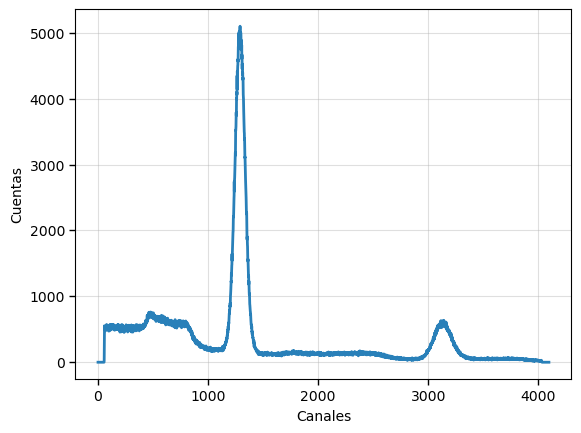

In [88]:
plt.plot(canales, cuentas, linewidth = 2, color = '#2980b9')
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.savefig('na22', dpi = 300, bbox_inches ='tight')
plt.show()

## Pico 1

In [116]:
canales = np.array(na22['canal'][1100:1500])
cuentas = np.array(na22['cuentas'][1100:1500])
initial_guess = [max(cuentas), np.mean(canales), np.std(canales), 
                            min(cuentas), (cuentas[-1] - cuentas[0])/(canales[-1] - canales[0]) ]
paramscsNa22_1, cov_Na22_1 = fit_curve(canales, cuentas, line_gaussian, initial_guess)

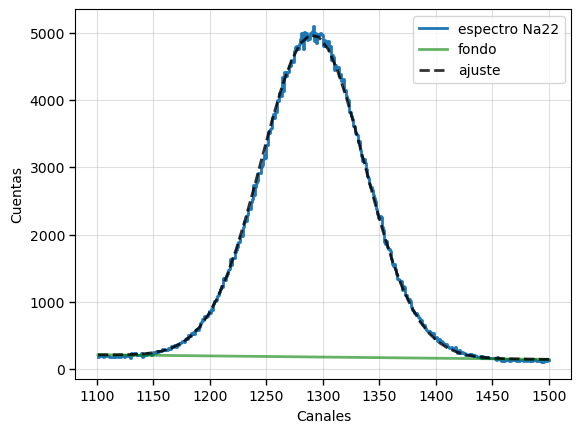

In [90]:
canales_plot = np.linspace(np.min(canales), np.max(canales))
plt.plot(canales, cuentas, ds ='steps-post', label = 'espectro Na22', linewidth = 2)
plt.plot(canales_plot, paramscsNa22_1[-2] + (canales_plot-paramscsNa22_1[1])*paramscsNa22_1[-1],
        label = 'fondo', color ='g', linewidth = 2, alpha = 0.6)
plt.plot(canales_plot, line_gaussian(canales_plot, *paramscsNa22_1), label = 'ajuste',
        color = 'k', linestyle = '--', linewidth = 2, alpha = 0.8)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()
plt.savefig('na22_1', dpi = 300, bbox_inches ='tight')
plt.show()

In [91]:
amplitud, centroide, std, a0, a1 = paramscsNa22_1

print('Centroide = {} [canales]'.format(centroide))
print('Desviación Estándar = {} [canales]'.format(std))
print('FWHM = {} [canales]'.format(2.355*std))
print('Intesidad = {} [cuentas]'.format(amplitud*np.sqrt(2*np.pi)*std))

Centroide = 1290.8728976130828 [canales]
Desviación Estándar = 45.51371419881547 [canales]
FWHM = 107.18479693821044 [canales]
Intesidad = 546664.4690159821 [cuentas]


## Pico 2

In [117]:
canales = np.array(na22['canal'][2800:3500])
cuentas = np.array(na22['cuentas'][2800:3500])
initial_guess = [max(cuentas), np.mean(canales), np.std(canales), 
                            min(cuentas), (cuentas[-1] - cuentas[0])/(canales[-1] - canales[0]) ]
paramscsNa22_2, cov_Na22_2 = fit_curve(canales, cuentas, line_gaussian, initial_guess)

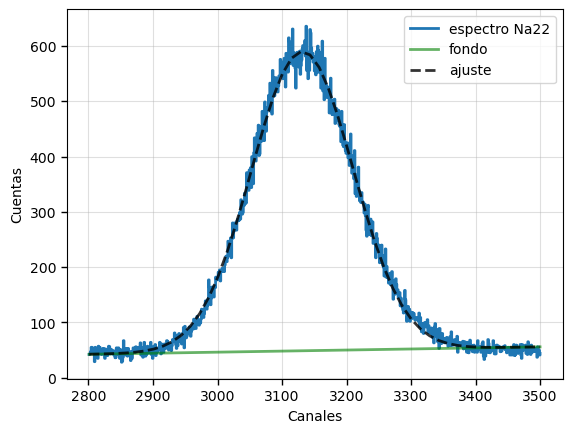

In [93]:
canales_plot = np.linspace(np.min(canales), np.max(canales))
plt.plot(canales, cuentas, ds ='steps-post', label = 'espectro Na22', linewidth = 2)
plt.plot(canales_plot, paramscsNa22_2[-2] + (canales_plot-paramscsNa22_2[1])*paramscsNa22_2[-1],
        label = 'fondo', color ='g', linewidth = 2, alpha = 0.6)
plt.plot(canales_plot, line_gaussian(canales_plot, *paramscsNa22_2), label = 'ajuste',
        color = 'k', linestyle = '--', linewidth = 2, alpha = 0.8)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()
plt.savefig('na22_2', dpi = 300, bbox_inches ='tight')
plt.show()

In [94]:
amplitud, centroide, std, a0, a1 = paramscsNa22_2

print('Centroide = {} [canales]'.format(centroide))
print('Desviación Estándar = {} [canales]'.format(std))
print('FWHM = {} [canales]'.format(2.355*std))
print('Intesidad = {} [cuentas]'.format(amplitud*np.sqrt(2*np.pi)*std))

Centroide = 3131.356693645266 [canales]
Desviación Estándar = 78.70768755996815 [canales]
FWHM = 185.356604203725 [canales]
Intesidad = 106841.3221323966 [cuentas]


# Calibración

In [95]:
energias = np.array([32.8, 511.0, 661.6, 1173.2, 1274.5, 1332.4])
canales = np.array([94.1, 1290.87, 1661.6, 2873.1, 3131.3, 3256.7])

initial_guess = [0, (energias[-1]-energias[0])/(canales[-1]-canales[0])]
param_calibracion, covs = fit_curve(canales, energias , line, initial_guess)

In [96]:
param_calibracion

array([-14.13504532,   0.41196346])

In [97]:
np.sqrt(covs[1,1])

0.002692588990595114

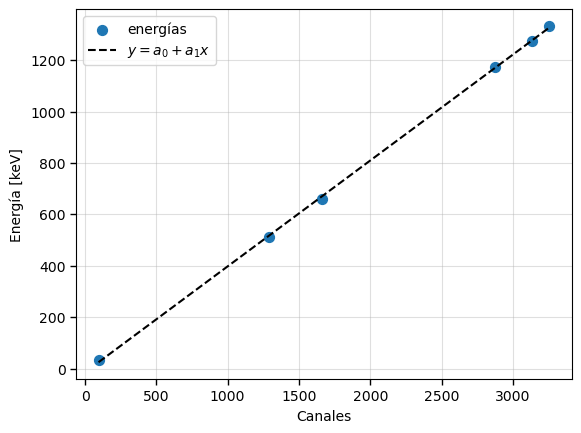

In [98]:
canales_plot = np.linspace(np.min(canales), np.max(canales))
plt.scatter(canales, energias, label = 'energías', s = 50)
plt.plot(canales_plot, line(canales_plot, *param_calibracion),
        label = r'$y=a_0+a_1x$', linestyle = '--', color = 'k')
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.xlabel('Canales')
plt.ylabel('Energía [keV]')
plt.grid(alpha = 0.4)
plt.legend()
plt.savefig('calibracion', dpi = 300, bbox_inches ='tight')
plt.show()

In [99]:
line(canales, *param_calibracion)

array([  24.63071592,  517.65622149,  670.38343363, 1169.47716091,
       1275.84612532, 1327.50634273])

In [100]:
energias - line(canales, *param_calibracion)

array([ 8.16928408, -6.65622149, -8.78343363,  3.72283909, -1.34612532,
        4.89365727])

In [101]:
(energias - line(canales, *param_calibracion))/energias*100

array([24.90635391, -1.30258737, -1.32760484,  0.31732348, -0.10561988,
        0.36728139])

# Borde Compton y Retrodispersión Co-60

In [102]:
co60 = pd.read_csv('Co60_10minNaI.csv')
canales = np.array(co60['canal'])
cuentas = np.array(co60['cuentas'])

In [103]:
canales = line(canales, *param_calibracion)

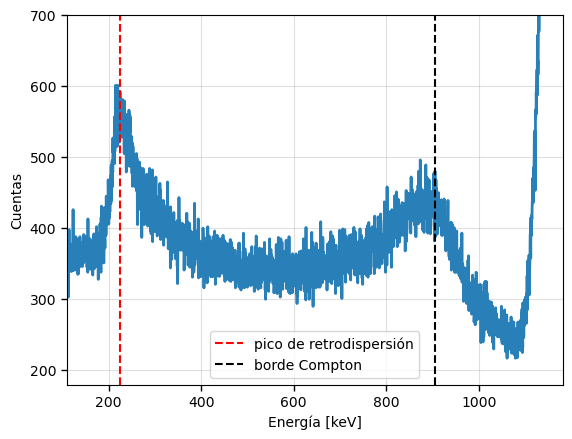

In [104]:
plt.plot(canales, cuentas, linewidth = 2, color = '#2980b9')
plt.xlabel('Energía [keV]')
plt.ylabel('Cuentas')
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.xlim(line(300, *param_calibracion), line(2900, *param_calibracion))
plt.ylim(180, 700)
plt.axvline(line(580, *param_calibracion), color = 'r', linestyle = '--', label = 'pico de retrodispersión')
plt.axvline(line(2230, *param_calibracion), color = 'k', linestyle = '--', label = 'borde Compton')
plt.legend()
plt.savefig('bordes_co-60_1', dpi = 300, bbox_inches ='tight')
plt.show()

In [105]:
line(580, *param_calibracion)

224.80375932303724

In [106]:
line(2230, *param_calibracion)

904.5434621769363

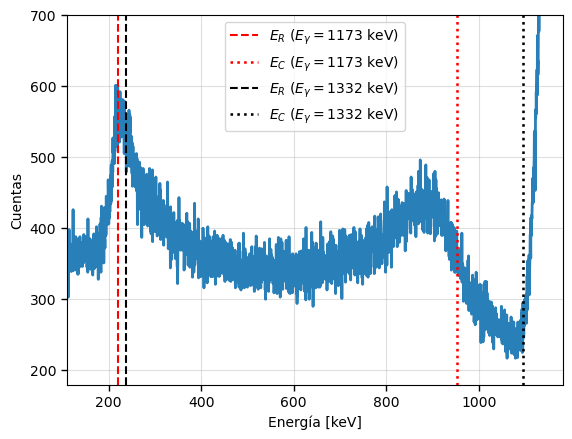

In [107]:
plt.plot(canales, cuentas, linewidth = 2, color = '#2980b9')
plt.xlabel('Energía [keV]')
plt.ylabel('Cuentas')
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.grid(alpha = 0.4)
plt.xlim(line(300, *param_calibracion), line(2900, *param_calibracion))
plt.ylim(180, 700)
plt.axvline(221.5, color = 'r', linestyle = '--', label = r'$E_R$ ($E_{\gamma}=1173$ keV)')
plt.axvline(951.5, color = 'r', linestyle = ':', label = r'$E_C$ ($E_{\gamma}=1173$ keV)', linewidth = 1.85)
plt.axvline(237.6, color = 'k', linestyle = '--', label = r'$E_R$ ($E_{\gamma}=1332$ keV)')
plt.axvline(1094.4, color = 'k', linestyle = ':', label = r'$E_C$ ($E_{\gamma}=1332$ keV)', linewidth = 1.85)
plt.legend()
plt.savefig('bordes_co-60_2', dpi = 300, bbox_inches ='tight')
plt.show()

# Razón Comptom/Foto-pico en el Cesio 137

In [108]:
M, mu, sigma, a0, a1 = paramsCs137_1
sig_M, sig_mu, sig_sigma, sig_a0, sig_a1 = cov_Cs137_1.diagonal()

N_f = np.sqrt(2*np.pi)*M*sigma
sig_N_f = N_f*((sig_M/M)**2+(sig_sigma/sigma)**2)**.5

print('N_f = {} +- {}'.format(N_f, sig_N_f))

N_f = 621841.7417871626 +- 4340.539191413418


In [109]:
cuentas_C = np.array(cs137['cuentas'])[580:2230]
N_C = np.sum(cuentas_C)
sig_N_C = np.sqrt(N_C)

print('N_C = {} +- {}'.format(N_C, sig_N_C))

N_C = 1006068 +- 1003.0294113334862


In [113]:
r = N_C/N_f
sig_r = r*((sig_N_C/N_C)**2+(sig_N_f/N_f)**2)**.5

print('r = {} +- {}'.format(r, sig_r))

r = 1.6178843142767767 +- 0.0114076621037374


# Razón entre la intensidad de los picos del Sodio 22

In [125]:
M, mu, sigma, a0, a1 = paramscsNa22_1
sig_M, sig_mu, sig_sigma, sig_a0, sig_a1 = cov_Na22_1.diagonal()

N_1 = np.sqrt(2*np.pi)*M*sigma
sig_N_1 = N_1*((sig_M/M)**2+(sig_sigma/sigma)**2)**.5

print('N_511 = {} +- {}'.format(N_1, sig_N_1))

N_511 = 546664.4690159821 +- 4489.729947775138


In [127]:
M, mu, sigma, a0, a1 = paramscsNa22_2
sig_M, sig_mu, sig_sigma, sig_a0, sig_a1 = cov_Na22_2.diagonal()

N_2 = np.sqrt(2*np.pi)*M*sigma
sig_N_2 = N_2*((sig_M/M)**2+(sig_sigma/sigma)**2)**.5

print('N_1275 = {} +- {}'.format(N_2, sig_N_2))

N_1275 = 106841.3221323966 +- 554.3876688574832


In [129]:
R = N_1/N_2
sig_R = R*((sig_N_1/N_1)**2+(sig_N_2/N_2)**2)**.5

print('R_exp = {} +- {}'.format(R, sig_R))

R_exp = 5.116601499357725 +- 0.049706715150288815
